# Scraping data

In [1]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup as bs
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
url = "https://www.worldometers.info/coronavirus/"
html_page = requests.get(url).text

In [3]:
soup = bs(html_page, 'html.parser')
table_rows = soup.find('tbody').find_all('tr')
table_rows = table_rows[8:8+215]

In [4]:
countries = []
tot_cases = []
new_cases = []
tot_deaths = []
new_deaths = []
tot_recov = []
new_recov = []
act_cases = []
ser_cases = []
cases_per_1m = []
deaths_per_1m = []
tot_tests = []
tests_per_1m = []
population = []
one_case_xpll = []
one_death_xpll = []
one_test_xpll = []

region = []

In [5]:
def text_to_int(text):
    try:
        text = text.replace(',', '')
        text = text.replace('+', '')
        text = pd.to_numeric(text, downcast='float')
    except:
        text = 0.0
    if text != text:
        return 0
    a = int(text)
    return a

In [6]:
for tr in table_rows:
    td = tr.find_all('td')
    countries.append(td[1].text.strip())
    tot_cases.append(text_to_int(td[2].text.strip()))
    new_cases.append(text_to_int(td[3].text.strip()))
    tot_deaths.append(text_to_int(td[4].text.strip()))
    new_deaths.append(text_to_int(td[5].text.strip()))
    new_recov.append(text_to_int(td[7].text.strip()))
    tot_recov.append(text_to_int(td[6].text.strip()))
    act_cases.append(text_to_int(td[8].text.strip()))
    ser_cases.append(text_to_int(td[9].text.strip()))
    cases_per_1m.append(text_to_int(td[10].text.strip()))
    deaths_per_1m.append(text_to_int(td[11].text.strip()))
    tot_tests.append(text_to_int(td[12].text.strip()))
    tests_per_1m.append(text_to_int(td[13].text.strip()))
    population.append(text_to_int(td[14].text.strip()))
    one_case_xpll.append(text_to_int(td[16].text.strip()))
    one_death_xpll.append(text_to_int(td[17].text.strip()))
    one_test_xpll.append(text_to_int(td[18].text.strip()))
    
    region.append(td[15].text.strip())

In [7]:
indices = [i for i in range(1,len(countries)+1)]
headers = ["Country", "Total Cases", "New Cases", "Total Deaths", "New Deaths", "Total Recovered", "New Recovered", "Active Cases", "Serious Cases", "Tot Cases/1M pop", "Death/1M pop", "Total Tests", "Tests/1M pop", "Population", "1 Case every X ppl", "1 Death every X ppl", "1 Test every X ppl"]

In [8]:
df = pd.DataFrame(list(zip(countries, tot_cases, new_cases, tot_deaths, new_deaths, tot_recov, new_recov, act_cases, ser_cases, cases_per_1m, deaths_per_1m, tot_tests, tests_per_1m, population, one_case_xpll, one_death_xpll, one_test_xpll)),index=indices,columns=headers)
df = df.sort_values(by='Total Cases', ascending=False)
df.index = range(1,len(df)+1)
df

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious Cases,Tot Cases/1M pop,Death/1M pop,Total Tests,Tests/1M pop,Population,1 Case every X ppl,1 Death every X ppl,1 Test every X ppl
1,USA,5111473,15949,164461,367,2618440,1473,2328572,18043,15433,497,64010900,193268,331203424,65,2014,5
2,Brazil,2967064,0,99702,0,2068394,0,798968,8318,13949,469,13206188,62084,212714816,72,2134,16
3,India,2129154,42290,43144,566,1461772,34103,624238,8944,1541,31,23387172,16930,1381382016,649,32018,59
4,Russia,882347,5212,14854,129,690207,6615,177286,2300,6046,102,30038124,205824,145941088,165,9825,5
5,South Africa,545476,0,9909,0,394759,0,140808,539,9186,167,3183658,53612,59383608,109,5993,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,MS Zaandam,9,0,2,0,0,0,7,0,0,0,0,0,0,0,0,0
212,British Virgin Islands,9,0,1,0,7,0,1,0,298,33,1522,50311,30252,3361,30252,20
213,St. Barth,9,0,0,0,6,0,3,0,911,0,1246,126113,9880,1098,0,8
214,Saint Pierre Miquelon,4,0,0,0,1,0,3,0,691,0,0,0,5791,1448,0,0


In [9]:
# df.to_excel('corona-virus-cases_Aug_08_2020.xlsx')

In [10]:
rg = pd.DataFrame(list(zip(countries, region)),index=indices,columns=["Country", "Region"])
# rg.to_excel('region.xlsx')
name_region = np.unique(rg['Region'])
name_region = name_region[1:]
reg = [[]] * len(name_region)
for i in range(len(name_region)):
    reg_name = name_region[i]
    reg[i] = np.unique(rg[rg['Region'] == reg_name]['Country'])
regi = dict(zip(name_region, reg))
x = 'Bahamas' in regi['North America']
df_re = [pd.DataFrame()] * len(name_region)
for i in range(len(name_region)):
    reg_name = name_region[i]
    df_re[i] = df[df['Country'].isin(regi[reg_name])]
dict_df_re = dict(zip(name_region, df_re))

# Visualization

* Heatmap

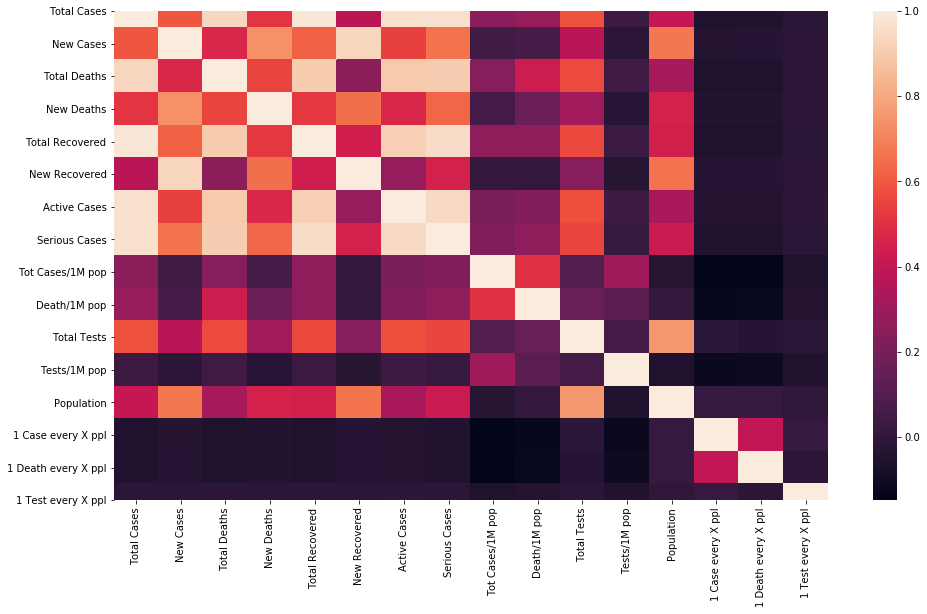

In [11]:
corr = df.corr()
plt.figure(figsize = (16,9))
sns.heatmap(corr)
plt.show()

* Top 20 Deaths per 1M population

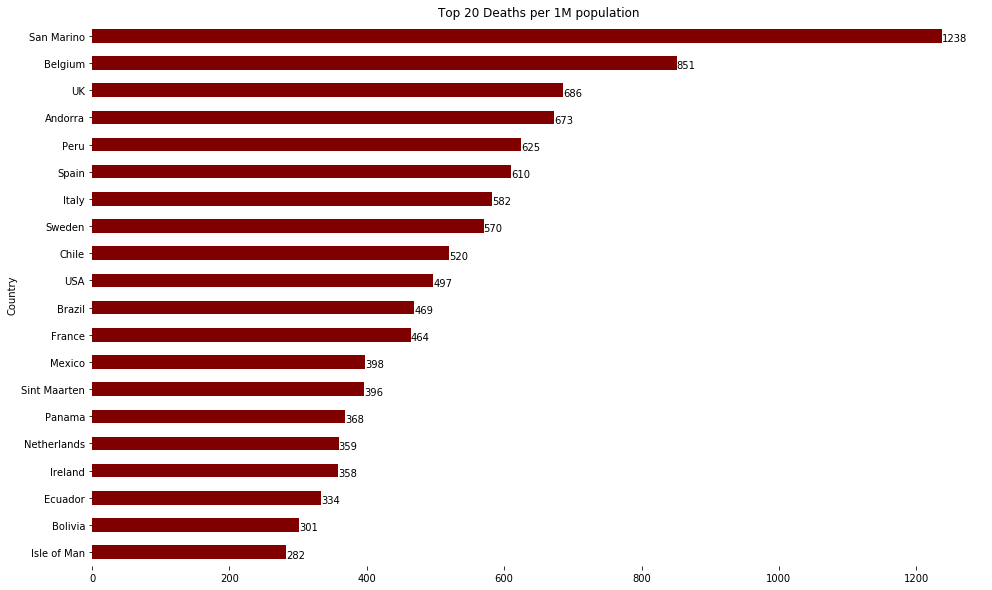

In [12]:
dp1m = df.nlargest(20,'Death/1M pop')[['Country', 'Death/1M pop']]
dp1m.index = range(1,len(dp1m)+1)
ax = dp1m[::-1].plot.barh(x='Country', y='Death/1M pop', figsize=(16, 10), color = "maroon", legend=False, title = 'Top 20 Deaths per 1M population')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
for i, v in enumerate(dp1m[::-1]['Death/1M pop']):
    ax.text(v, i-.2, str(v))

* ?

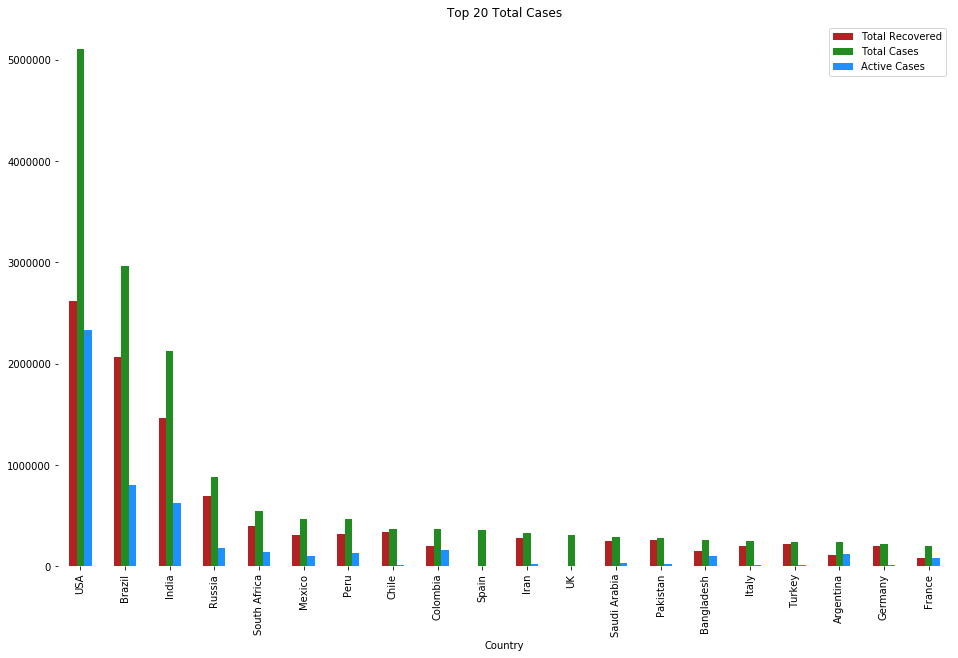

In [13]:
cad = df.nlargest(20,'Total Cases')[['Country', 'Total Cases', 'Total Recovered', 'Active Cases']]
cad.index = range(1,len(cad)+1)
ax = cad.plot.bar(x='Country', y={'Total Cases', 'Total Recovered', 'Active Cases'}, figsize=(16, 10), color = {"forestgreen", "dodgerblue", "firebrick"}, legend=True, title = 'Top 20 Total Cases')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

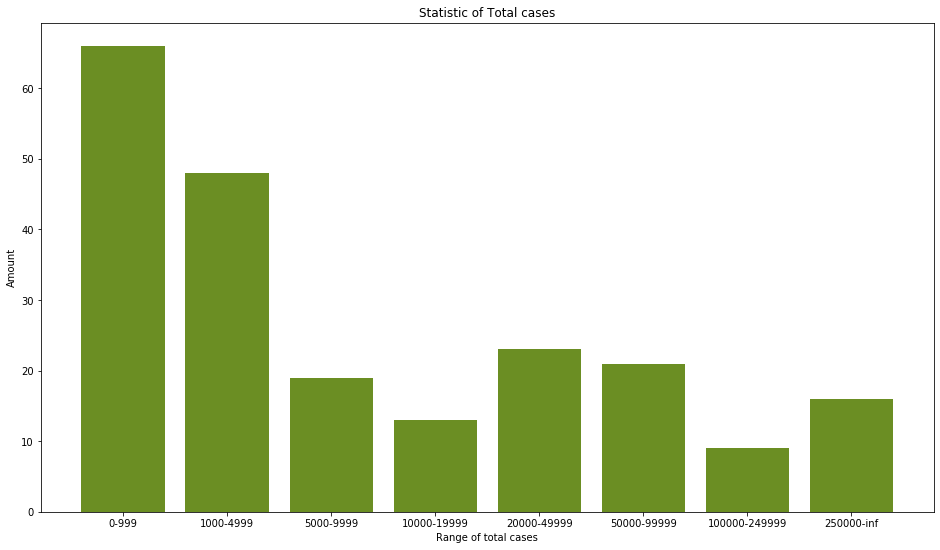

In [14]:
range_ = [0, 1000, 5000, 10000, 20000, 50000, 100000, 250000, 2000000000]
xtext = []
for i in range(len(range_) - 2):
    xtext.append(str(range_[i]) + '-' + str(range_[i+1]-1))
xtext.append(str(range_[len(range_)-2]) + '-inf')
range_tot_cases = []
list_tot = df['Total Cases'].to_list()
for i in range(len(range_) - 1):
    c = 0
    for j in list_tot:
        if j >= range_[i] and j < range_[i+1]:
            c += 1
    range_tot_cases.append(c)
x_pos = [i for i, _ in enumerate(xtext)]
plt.figure(figsize=(16, 9))
plt.bar(x_pos, range_tot_cases, color='olivedrab')
plt.xlabel("Range of total cases")
plt.ylabel("Amount")
plt.title("Statistic of Total cases")
plt.xticks(x_pos, xtext)
plt.show()

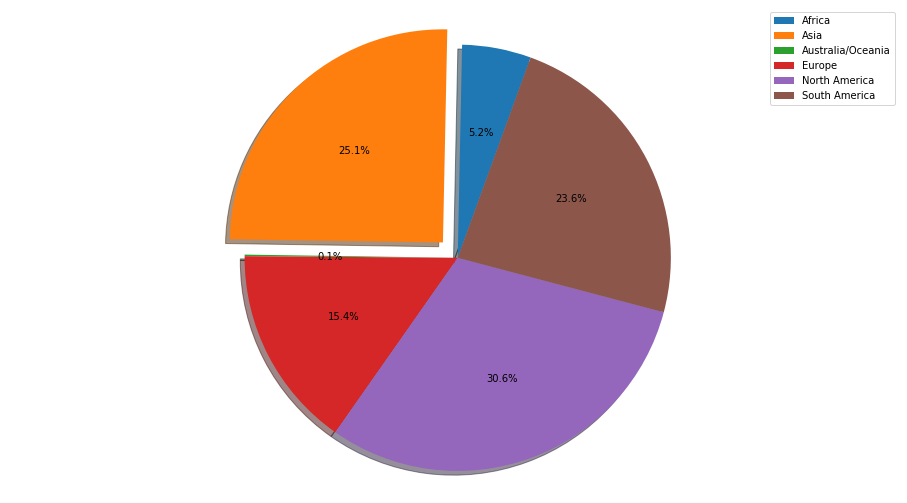

In [15]:
reg_tot_cases = []
# print(name_region)
for name_regi, df_re in dict_df_re.items():
    reg_tot_cases.append(sum(df_re['Total Cases']))
reg_tot_cases
region_percent = [i*sum(reg_tot_cases)/100 for i in reg_tot_cases]

labels = name_region
sizes = reg_tot_cases
explode = (0, 0.1, 0, 0, 0, 0)  # explode 1st slice

# Plot
patches, texts, autotexts = plt.pie(sizes, explode=explode, colors=mcolors.TABLEAU_COLORS, autopct='%1.1f%%', shadow=True, startangle=70)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(16,9)
plt.show()

* The relionship between Serious Cases and Total Deaths

0.5872575362490924


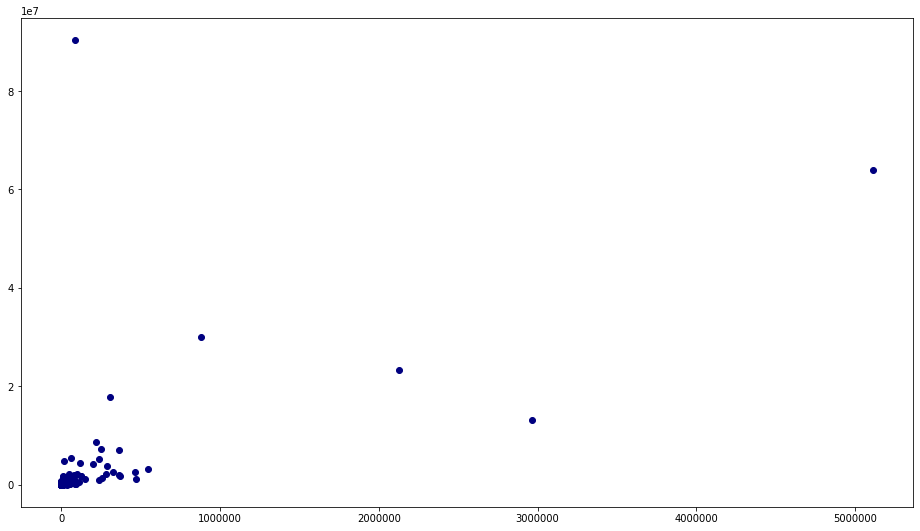

In [16]:
xname = 'Total Cases'
yname = 'Total Tests'
ndf = df[['Country', yname, xname]]
ndf.index = range(1,len(ndf)+1)
print(ndf[yname].corr(ndf[xname]))
X = ndf[xname].values.reshape(-1, 1)
Y = ndf[yname].values.reshape(-1, 1)
plt.figure(figsize=(16, 9))
plt.scatter(X, Y, color='navy')
plt.show()